<a href="https://colab.research.google.com/github/FaisalAnjum4/FINAL-REPORT-CODE-48113883-COMP8240-APP.-OF-DATA-SCIENCE/blob/main/Md_Faisal_Anjum_48113883_Final_Report.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
!pip install nltk

# **Installing via pip (!pip install fasttext) ensures the FastText package is present in the Google Colab**

In [2]:
!pip install fasttext


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.4/73.4 kB 2.1 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached pybind11-2.13.6-py3-none-any.whl.metadata (9.5 kB)
Using cached pybind11-2.13.6-py3-none-any.whl (243 kB)
  Created wheel for fasttext: filename=fasttext-0.9.3-cp310-cp310-linux_x86_64.whl size=4296182 sha256=25de168505ec416bca4d2cf3ed7b19571b090822ad30652c74e20e962e87fcef
  Stored in directory: /root/.cache/pip/wheels/0d/a2/00/81db54d3e6a8199b829d58e02cec2ddb20ce3e59fad8d3c92a
Successfully built fasttext


**We used h=10 for all datasets in the replication aligns with the original paper's approach, ensuring consistency across experiments**

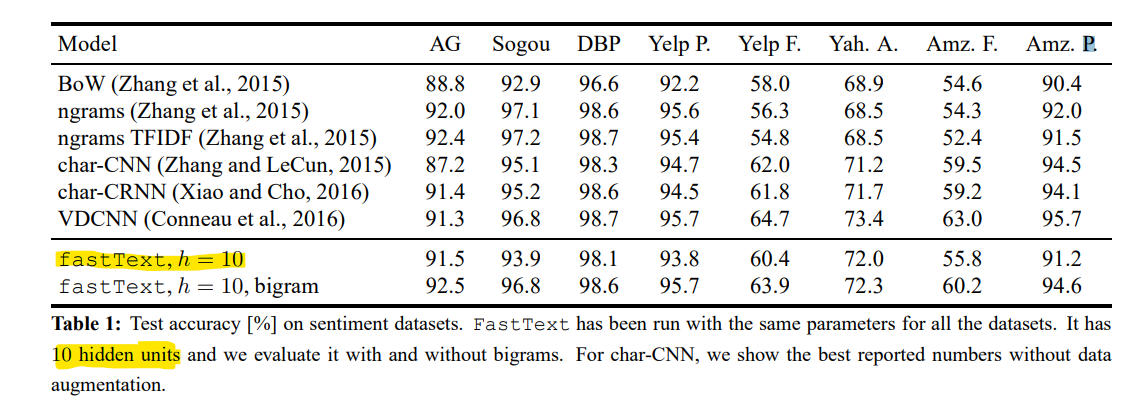

# **REPLICATION OF YELP F DATASET**

In [ ]:
import pandas as pd

# Load the training and test datasets
train_df = pd.read_csv('yelpf_train.csv')
test_df = pd.read_csv('yelpf_test.csv')

# Display the first few rows to understand the structure
#print("Train Data Sample:")
#print(train_df.head())

#print("\nTest Data Sample:")
#print(test_df.head())

# Rename columns to 'label' and 'text' (adjust column names if needed)
train_df.columns = ['label', 'text']
test_df.columns = ['label', 'text']

# Clean the text: convert to lowercase, remove special characters, and strip whitespace
train_df['text'] = train_df['text'].str.lower().str.replace(r'[^a-zA-Z0-9\s]', '', regex=True).str.strip()
test_df['text'] = test_df['text'].str.lower().str.replace(r'[^a-zA-Z0-9\s]', '', regex=True).str.strip()

# Prepare the training data for FastText
train_df['fasttext_format'] = train_df['label'].apply(lambda x: f'__label__{x}') + ' ' + train_df['text']
preprocessed_train_file = 'yelpf_train_fasttext.txt'
train_df['fasttext_format'].to_csv(preprocessed_train_file, index=False, header=False)

# Prepare the test data for FastText
test_df['fasttext_format'] = test_df['label'].apply(lambda x: f'__label__{x}') + ' ' + test_df['text']
preprocessed_test_file = 'yelpf_test_fasttext.txt'
test_df['fasttext_format'].to_csv(preprocessed_test_file, index=False, header=False)

print("\nPreprocessing complete. Data saved for FastText.")



Preprocessing complete. Data saved for FastText.


**This code reads the yelpf_train.csv and yelpf_test.csv training and test datasets, renames the columns to "label" and "text," and cleans the text by removing special characters, converting it to lowercase, and removing whitespace. After that, it prepares the data for supervised learning by formatting it for FastText by preceding the text with label prefixes ( __label __x). As inputs for FastText training and testing, the formatted data is saved as two distinct files, yelpf_train_fasttext.txt and yelpf_test_fasttext.txt. A notice confirming the completion of preprocessing appears at the end of the script.**

## 10 hidden Units without Bigrams

In [ ]:
 import fasttext

# Train the FastText model
model = fasttext.train_supervised(
    input=preprocessed_train_file,
    lr=0.05,            # Initial learning rate
    epoch=10,          # Number of epochs
    dim=10,            # Set h=10
    thread=90          # Use 90 threads for faster training
)

# Save the model
model.save_model('fasttext_yelpf_model_h10.bin')

print("\nModel training complete.")






Model training complete.


**Hyperparameters:**

**Several parameters are set:**

**lr=0.05:** Sets the initial learning rate to 0.05, controlling how quickly the model adjusts weights.

**epoch=10:** Sets the number of passes over the training data to 10, defining the number of training iterations.

**dim=10:** Sets the dimension of word vectors (h=10), determining the size of the word embeddings.

**thread=90:** Utilizes 90 CPU threads for faster parallel processing during training.

**Save the Model:** Once training is complete, the trained model is saved to a file (fasttext_yelpf_model_h10.bin) for later use.

In [ ]:
# Evaluate the model on the test set
n_examples, precision, recall = model.test(preprocessed_test_file)

# Print results
print(f'Test Precision: {precision * 100:.2f}%')
print(f'Test Recall: {recall * 100:.2f}%')
print(f'Number of test examples: {n_examples}')


Test Precision: 60.12%
Test Recall: 60.12%
Number of test examples: 49999


**Model Evaluation:** The test() method is called on the model, using the preprocessed test data (preprocessed_test_file) as input.

It returns three values:

**n_examples:** The number of test examples evaluated.

**precision:** The fraction of correctly predicted labels among all predicted labels.

**recall:** The fraction of correctly predicted labels among all actual labels.

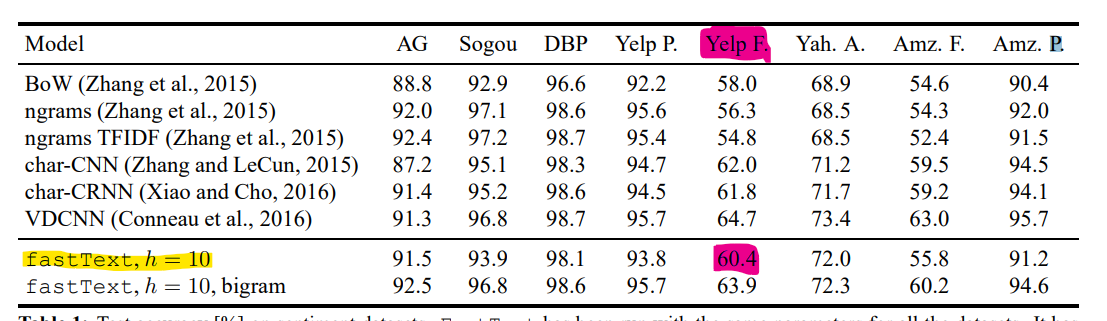The original paper reports a test accuracy of 60.4% for Yelp F with h=10. The replication results show a test precision and recall of 60.12%, based on 49,999 test examples. This results in a slight deviation of 0.28% from the original figure. The small discrepancy indicates that the replication closely matches the original performance. Overall, the replication effectively mirrors the original experiment’s outcomes for this configuration.


## 10 hidden Units with Bigrams

In [ ]:
 import fasttext

# Train the FastText model
model = fasttext.train_supervised(
    input=preprocessed_train_file,
    lr=0.05,            # Initial learning rate
    epoch=10,          # Number of epochs
    wordNgrams=2,      # Use bigrams
    dim=10,            # Set h=10
    thread=90          # Use 90 threads for faster training
)

# Save the model
model.save_model('fasttext_yelpf_model_h10.bin')

print("\nModel training complete.")






Model training complete.


In [ ]:
# Evaluate the model on the test set
n_examples, precision, recall = model.test(preprocessed_test_file)

# Print results
print(f'Test Precision: {precision * 100:.2f}%')
print(f'Test Recall: {recall * 100:.2f}%')
print(f'Number of test examples: {n_examples}')


Test Precision: 62.94%
Test Recall: 62.94%
Number of test examples: 49999


# **REPLICATION OF SOGOU DATASET**

In [ ]:
import pandas as pd

# Load the Sogou News training dataset with error handling
sogou_train_df = pd.read_csv('sogou_train.csv', on_bad_lines='skip', engine='python')
sogou_test_df = pd.read_csv('sogou_test.csv', on_bad_lines='skip', engine='python')

# Display the first few rows to confirm successful loading
print("Sogou Train Data Sample:")
print(sogou_train_df.head())


Sogou Train Data Sample:
   4 2008 di4 qi1 jie4 qi1ng da3o guo2 ji4 che1 zha3n me3i nv3 mo2 te4   \
0  4                zho1ng hua2 ju4n jie2 FRV ya4o shi                    
1  3                                ya2ng sho4u che2ng                    
2  2   guo2 ta4i ju1n a1n : guo2 dia4n dia4n li4 ke3...                   
3  3   sho3u du1 yi1n le4 jia1 ci2 sha4n yi4 ya3n   ...                   
4  3   cui1 yo3ng yua2n ru4 chua1n   ji1 ji1n hui4 y...                   

  2008di4 qi1 jie4 qi1ng da3o guo2 ji4 che1 zha3n yu2 15 ri4 za4i qi1ng da3o guo2 ji4 hui4 zha3n zho1ng xi1n she4ng da4 ka1i mu4 . be3n ci4 che1 zha3n jia1ng chi2 xu4 da4o be3n yue4 19 ri4 . ji1n nia2n qi1ng da3o guo2 ji4 che1 zha3n shi4 li4 nia2n da3o che2ng che1 zha3n gui1 mo2 zui4 da4 di2 yi1 ci4 , shi3 yo4ng lia3o qi1ng da3o guo2 ji4 hui4 zha3n zho1ng xi1n di2 qua2n bu4 shi4 ne4i wa4i zha3n gua3n . yi3 xia4 we2i xia4n cha3ng mo2 te4 tu2 pia4n .  
0      tu2 we2i zho1ng hua2 ju4n jie2 FRV ya4o shi .                 

In [ ]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords

# Download NLTK stopwords
#nltk.download('stopwords')
#nltk.download('wordnet')

# Load the Sogou News training and test datasets
sogou_train_df = pd.read_csv('sogou_train.csv', on_bad_lines='skip', engine='python')
sogou_test_df = pd.read_csv('sogou_test.csv', on_bad_lines='skip', engine='python')

# Adjust column names based on the structure of your dataset
sogou_train_df.columns = ['id', 'label', 'text']
sogou_test_df.columns = ['id', 'label', 'text']

# Remove the 'id' column as it's not needed for training
sogou_train_df = sogou_train_df[['label', 'text']]
sogou_test_df = sogou_test_df[['label', 'text']]

# Get the set of stopwords for removal
stop_words = set(stopwords.words('english'))

# Precompile regex patterns for efficiency
url_pattern = re.compile(r'http\S+|www\S+|https\S+')
special_char_pattern = re.compile(r'[^a-zA-Z\s]')
extra_space_pattern = re.compile(r'\s+')

def fast_preprocess(text):
    # Convert to lowercase
    text = text.lower()

    # Remove URLs
    text = url_pattern.sub('', text)

    # Remove special characters and digits
    text = special_char_pattern.sub('', text)

    # Remove extra spaces
    text = extra_space_pattern.sub(' ', text).strip()

    # Remove stop words in a vectorized way
    words = text.split()
    words = [word for word in words if word not in stop_words]

    # Join back into a string
    return ' '.join(words)

# Apply preprocessing using vectorized operations
sogou_train_df['text'] = sogou_train_df['text'].map(fast_preprocess)
sogou_test_df['text'] = sogou_test_df['text'].map(fast_preprocess)

# Prepare the training data for FastText
sogou_train_df['fasttext_format'] = sogou_train_df['label'].apply(lambda x: f'__label__{x}') + ' ' + sogou_train_df['text']
preprocessed_sogou_train_file = 'sogou_train_fasttext.txt'
sogou_train_df['fasttext_format'].to_csv(preprocessed_sogou_train_file, index=False, header=False)

# Prepare the test data for FastText
sogou_test_df['fasttext_format'] = sogou_test_df['label'].apply(lambda x: f'__label__{x}') + ' ' + sogou_test_df['text']
preprocessed_sogou_test_file = 'sogou_test_fasttext.txt'
sogou_test_df['fasttext_format'].to_csv(preprocessed_sogou_test_file, index=False, header=False)

print("\nOptimized preprocessing complete. Data saved for FastText.")


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!



Optimized preprocessing complete. Data saved for FastText.


In [ ]:
import fasttext

# Train the FastText model on the Sogou News dataset
sogou_model = fasttext.train_supervised(
    input=preprocessed_sogou_train_file,
    lr=0.05,           # Initial learning rate
    epoch=25,         # Number of epochs
    dim=10,           # Set h=10
    thread=90         # Use 30 threads for faster training
    #minn=3,           # Minimum length of char n-gram
    #maxn=6
    )

# Save the model
sogou_model.save_model('fasttext_sogou_model_h10.bin')

print("\nModel training complete.")



Model training complete.


In [ ]:
# Evaluate the model on the test set
n_examples, precision, recall = sogou_model.test(preprocessed_sogou_test_file)

# Print the results
print(f'Test Precision: {precision * 100:.2f}%')
print(f'Test Recall: {recall * 100:.2f}%')
print(f'Number of test examples: {n_examples}')


Test Precision: 87.04%
Test Recall: 87.04%
Number of test examples: 50299


In [ ]:
import fasttext

# Train the FastText model on the Sogou News dataset
sogou_model = fasttext.train_supervised(
    input=preprocessed_sogou_train_file,
    lr=0.1,           # Initial learning rate
    epoch=25,         # Number of epochs
    dim=10,           # Set h=10
    thread=90         # Use 30 threads for faster training
    #minn=3,           # Minimum length of char n-gram
    #maxn=6
    )

# Save the model
sogou_model.save_model('fasttext_sogou_model_h10.bin')

print("\nModel training complete.")



Model training complete.


In [ ]:
# Evaluate the model on the test set
n_examples, precision, recall = sogou_model.test(preprocessed_sogou_test_file)

# Print the results
print(f'Test Precision: {precision * 100:.2f}%')
print(f'Test Recall: {recall * 100:.2f}%')
print(f'Number of test examples: {n_examples}')


Test Precision: 88.27%
Test Recall: 88.27%
Number of test examples: 50299


In [ ]:
import fasttext

# Train the FastText model on the Sogou News dataset
sogou_model = fasttext.train_supervised(
    input=preprocessed_sogou_train_file,
    lr=0.1,           # Initial learning rate
    epoch=200,         # Number of epochs
    dim=10,           # Set h=10
    thread=90         # Use 30 threads for faster training
    #minn=3,           # Minimum length of char n-gram
    #maxn=6
    )

# Save the model
sogou_model.save_model('fasttext_sogou_model_h10.bin')

print("\nModel training complete.")



Model training complete.


In [ ]:
# Evaluate the model on the test set
n_examples, precision, recall = sogou_model.test(preprocessed_sogou_test_file)

# Print the results
print(f'Test Precision: {precision * 100:.2f}%')
print(f'Test Recall: {recall * 100:.2f}%')
print(f'Number of test examples: {n_examples}')


Test Precision: 89.49%
Test Recall: 89.49%
Number of test examples: 50299


In [ ]:
import fasttext

# Train the FastText model on the Sogou News dataset
sogou_model = fasttext.train_supervised(
    input=preprocessed_sogou_train_file,
    lr=0.1,           # Initial learning rate
    epoch=200,         # Number of epochs
    wordNgrams=2,     # Use bigrams
    dim=10,           # Set h=10
    thread=90         # Use 30 threads for faster training
    #minn=3,           # Minimum length of char n-gram
    #maxn=6
    )

# Save the model
sogou_model.save_model('fasttext_sogou_model_h10.bin')

print("\nModel training complete.")



Model training complete.


In [ ]:
# Evaluate the model on the test set
n_examples, precision, recall = sogou_model.test(preprocessed_sogou_test_file)

# Print the results
print(f'Test Precision: {precision * 100:.2f}%')
print(f'Test Recall: {recall * 100:.2f}%')
print(f'Number of test examples: {n_examples}')


Test Precision: 88.99%
Test Recall: 88.99%
Number of test examples: 50299


In [ ]:
import fasttext

# Train the FastText model on the Sogou News dataset
sogou_model = fasttext.train_supervised(
    input=preprocessed_sogou_train_file,
    lr=0.1,           # Initial learning rate
    epoch=100,         # Number of epochs
   # wordNgrams=2,     # Use bigrams
    dim=10,           # Set h=10
    thread=90         # Use 30 threads for faster training
    #minn=3,           # Minimum length of char n-gram
    #maxn=6
    )

# Save the model
sogou_model.save_model('fasttext_sogou_model_h10.bin')

print("\nModel training complete.")



Model training complete.


In [ ]:
# Evaluate the model on the test set
n_examples, precision, recall = sogou_model.test(preprocessed_sogou_test_file)

# Print the results
print(f'Test Precision: {precision * 100:.2f}%')
print(f'Test Recall: {recall * 100:.2f}%')
print(f'Number of test examples: {n_examples}')


Test Precision: 89.28%
Test Recall: 89.28%
Number of test examples: 50299


# **For My Dataset ( Twitter Sentiment Data )**

In [10]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer

# Ensure required NLTK resources are downloaded
nltk.download('stopwords')
nltk.download('wordnet')

# Define preprocessing variations
stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()

url_pattern = re.compile(r'http\S+|www\S+|https\S+')
special_char_pattern = re.compile(r'[^a-zA-Z\s]')
extra_space_pattern = re.compile(r'\s+')

# Tokenization function
def tokenize(text):
    return text.split()

# Preprocessing function
def preprocess_text(text, use_stopwords=True, use_stemming=False, use_lemmatization=False):
    # Convert to lowercase
    text = text.lower()
    # Remove URLs
    text = url_pattern.sub('', text)
    # Remove special characters
    text = special_char_pattern.sub('', text)
    # Remove extra spaces
    text = extra_space_pattern.sub(' ', text).strip()

    # Tokenization
    tokens = tokenize(text)

    # Remove stopwords
    if use_stopwords:
        tokens = [word for word in tokens if word not in stop_words]

    # Apply stemming
    if use_stemming:
        tokens = [stemmer.stem(word) for word in tokens]

    # Apply lemmatization
    if use_lemmatization:
        tokens = [lemmatizer.lemmatize(word) for word in tokens]

    # Join tokens back to string
    return ' '.join(tokens)

# Load the dataset
twitter_df = pd.read_csv('twitter_sentiment_data.csv')
twitter_df.columns = ['label', 'text', 'tweetid']
twitter_df = twitter_df[['label', 'text']]

# Preprocess the dataset with one configuration (adjustable)
preprocessed_texts = twitter_df['text'].map(lambda x: preprocess_text(
    x,
    use_stopwords=True,
    use_stemming=False,
    use_lemmatization=True
))

# Create a new DataFrame for the preprocessed text
preprocessed_df = pd.DataFrame({'label': twitter_df['label'], 'preprocessed_text': preprocessed_texts})

# Display the first few rows of the preprocessed DataFrame
print(preprocessed_df.head())


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


   label                                  preprocessed_text
0     -1  tiniebeany climate change interesting hustle g...
1      1  rt natgeochannel watch beforetheflood right le...
2      1  fabulous leonardo dicaprios film climate chang...
3      1  rt mickfanning watched amazing documentary leo...
4      2  rt cnalive pranita biswasi lutheran odisha giv...


In [ ]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
import fasttext

# Ensure required NLTK resources are downloaded
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.stem import PorterStemmer, WordNetLemmatizer

# Define preprocessing variations
stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()

url_pattern = re.compile(r'http\S+|www\S+|https\S+')
special_char_pattern = re.compile(r'[^a-zA-Z\s]')
extra_space_pattern = re.compile(r'\s+')

# Tokenization function
def tokenize(text):
    return text.split()

# Preprocessing functions
def preprocess_text(text, use_stopwords=True, use_stemming=False, use_lemmatization=False):
    # Convert to lowercase
    text = text.lower()
    # Remove URLs
    text = url_pattern.sub('', text)
    # Remove special characters
    text = special_char_pattern.sub('', text)
    # Remove extra spaces
    text = extra_space_pattern.sub(' ', text).strip()

    # Tokenization
    tokens = tokenize(text)

    # Remove stopwords
    if use_stopwords:
        tokens = [word for word in tokens if word not in stop_words]

    # Apply stemming
    if use_stemming:
        tokens = [stemmer.stem(word) for word in tokens]

    # Apply lemmatization
    if use_lemmatization:
        tokens = [lemmatizer.lemmatize(word) for word in tokens]

    # Join tokens back to string
    return ' '.join(tokens)

# Hyperparameter tuning
preprocess_configs = [
    {'use_stopwords': True, 'use_stemming': False, 'use_lemmatization': False},
    {'use_stopwords': True, 'use_stemming': True, 'use_lemmatization': False},
    {'use_stopwords': True, 'use_stemming': False, 'use_lemmatization': True},
    {'use_stopwords': False, 'use_stemming': True, 'use_lemmatization': False},
]

model_configs = [
    {'lr': 0.05, 'epoch': 50, 'wordNgrams': 2, 'dim': 10},
    {'lr': 0.05, 'epoch': 25, 'wordNgrams': 2, 'dim': 10},
    {'lr': 0.1, 'epoch': 25, 'wordNgrams': 3, 'dim': 10},
    {'lr': 0.1, 'epoch': 50, 'wordNgrams': 2, 'dim': 10}
]

# Load the dataset
twitter_df = pd.read_csv('twitter_sentiment_data.csv')
twitter_df.columns = ['label', 'text', 'tweetid']
twitter_df = twitter_df[['label', 'text']]

# Split the dataset
from sklearn.model_selection import train_test_split
train_df, test_df = train_test_split(twitter_df, test_size=0.2, random_state=42)

best_accuracy = 0
best_config = {}

# Iterate over preprocessing configurations
for preprocess_config in preprocess_configs:
    print(f"\nTesting Preprocessing Config: {preprocess_config}")

    # Apply preprocessing
    train_df['text'] = train_df['text'].map(lambda x: preprocess_text(
        x,
        use_stopwords=preprocess_config['use_stopwords'],
        use_stemming=preprocess_config['use_stemming'],
        use_lemmatization=preprocess_config['use_lemmatization']
    ))

    test_df['text'] = test_df['text'].map(lambda x: preprocess_text(
        x,
        use_stopwords=preprocess_config['use_stopwords'],
        use_stemming=preprocess_config['use_stemming'],
        use_lemmatization=preprocess_config['use_lemmatization']
    ))

    # Prepare data for FastText
    train_df['fasttext_format'] = train_df['label'].apply(lambda x: f'__label__{x}') + ' ' + train_df['text']
    test_df['fasttext_format'] = test_df['label'].apply(lambda x: f'__label__{x}') + ' ' + test_df['text']

    preprocessed_train_file = 'twitter_train_fasttext.txt'
    preprocessed_test_file = 'twitter_test_fasttext.txt'
    train_df['fasttext_format'].to_csv(preprocessed_train_file, index=False, header=False)
    test_df['fasttext_format'].to_csv(preprocessed_test_file, index=False, header=False)

    # Iterate over model configurations
    for model_config in model_configs:
        print(f"\nTesting Model Config: {model_config}")

        # Train FastText model
        twitter_model = fasttext.train_supervised(
            input=preprocessed_train_file,
            lr=model_config['lr'],
            epoch=model_config['epoch'],
            wordNgrams=model_config['wordNgrams'],
            dim=model_config['dim'],
            thread=90
        )

        # Evaluate on the training set
        n_train_examples, train_precision, train_recall = twitter_model.test(preprocessed_train_file)
        train_accuracy = train_precision * 100

        # Evaluate on the test set
        n_test_examples, test_precision, test_recall = twitter_model.test(preprocessed_test_file)
        test_accuracy = test_precision * 100

        print(f"Training Accuracy: {train_accuracy:.2f}%")
        print(f"Test Accuracy: {test_accuracy:.2f}%")

        # Update best configuration if accuracy is improved
        if test_accuracy > best_accuracy:
            best_accuracy = test_accuracy
            best_config = {
                'preprocessing': preprocess_config,
                'model': model_config,
                'train_accuracy': train_accuracy
            }

print("\nBest Configuration:")
print(best_config)
print(f"Best Test Accuracy: {best_accuracy:.2f}%")
print(f"Best Training Accuracy: {best_config['train_accuracy']:.2f}%")


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!



Testing Preprocessing Config: {'use_stopwords': True, 'use_stemming': False, 'use_lemmatization': False}

Testing Model Config: {'lr': 0.05, 'epoch': 50, 'wordNgrams': 2, 'dim': 10}
Training Accuracy: 99.84%
Test Accuracy: 74.82%

Testing Model Config: {'lr': 0.05, 'epoch': 25, 'wordNgrams': 2, 'dim': 10}
Training Accuracy: 99.68%
Test Accuracy: 75.22%

Testing Model Config: {'lr': 0.1, 'epoch': 25, 'wordNgrams': 3, 'dim': 10}
Training Accuracy: 99.85%
Test Accuracy: 74.37%

Testing Model Config: {'lr': 0.1, 'epoch': 50, 'wordNgrams': 2, 'dim': 10}
Training Accuracy: 99.85%
Test Accuracy: 74.56%

Testing Preprocessing Config: {'use_stopwords': True, 'use_stemming': True, 'use_lemmatization': False}

Testing Model Config: {'lr': 0.05, 'epoch': 50, 'wordNgrams': 2, 'dim': 10}
Training Accuracy: 99.84%
Test Accuracy: 74.91%

Testing Model Config: {'lr': 0.05, 'epoch': 25, 'wordNgrams': 2, 'dim': 10}
Training Accuracy: 99.63%
Test Accuracy: 74.88%

Testing Model Config: {'lr': 0.1, 'epoch

| Component       | Details                                                                                       |
|-----------------|-----------------------------------------------------------------------------------------------|
| **Dataset**     | Twitter Sentiment dataset                                                                    |
| **Preprocessing** | Combinations of stopword removal, stemming, lemmatization, and tokenization                 |
|                 | - **Best Preprocessing:** Stopword removal + Lemmatization + Tokenization                     |
|                 | - **Applied transformations:** lowercase, URL removal, special character removal,             |
|                 |   extra space removal, and tokenization (splitting text into individual words)                |
| **Model**       | FastText                                                                                     |
| **Hyperparameters** | - Learning rate: 0.05                                                                     |
|                 | - Epochs: 25                                                                                 |
|                 | - wordNgrams: 2 (bigrams)                                                                     |
|                 | - Dimension: 10                                                                              |
| **Best Accuracy** | - Training Accuracy: 99.68%                                                                 |
|                 | - Test Accuracy: 75.22%                                                                      |
| **Implications** | High training accuracy and relatively lower test accuracy indicate good learning on         |
|                 | training data, but possible domain-specific variations in test data performance.              |
